In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

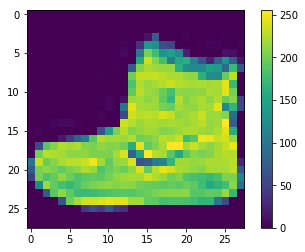

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

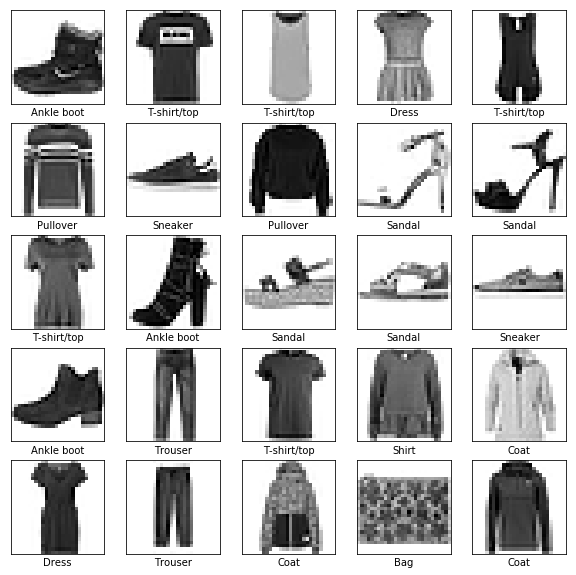

In [8]:
# verify data is correct - check 25 images in training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Build the model 
model = keras.Sequential([
    # transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # 10-node softmax layer—this returns an array of 10 probability scores that sum to 1.
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train model 
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4944 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3753 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3394 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3154 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2965 - acc: 0.8910


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# example of overfitting - model performs worse on new data
# training accuracy: 0.8925
# test accuracy: 0.8759

10000/10000 [==============================] - 0s 18us/sample - loss: 0.3472 - acc: 0.8754


In [16]:
# Make predictions
predictions = model.predict(test_images)
predictions[0] # array of 10 numbers, each num is confidence of label
# get the highest confidence value
predicted_label = class_names[np.argmax(predictions[0])]
predicted_label

'Ankle boot'

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


In [18]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

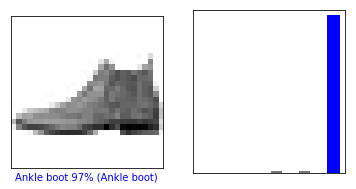

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

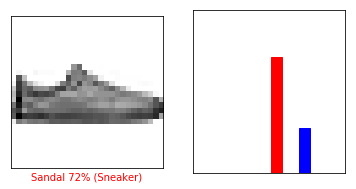

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

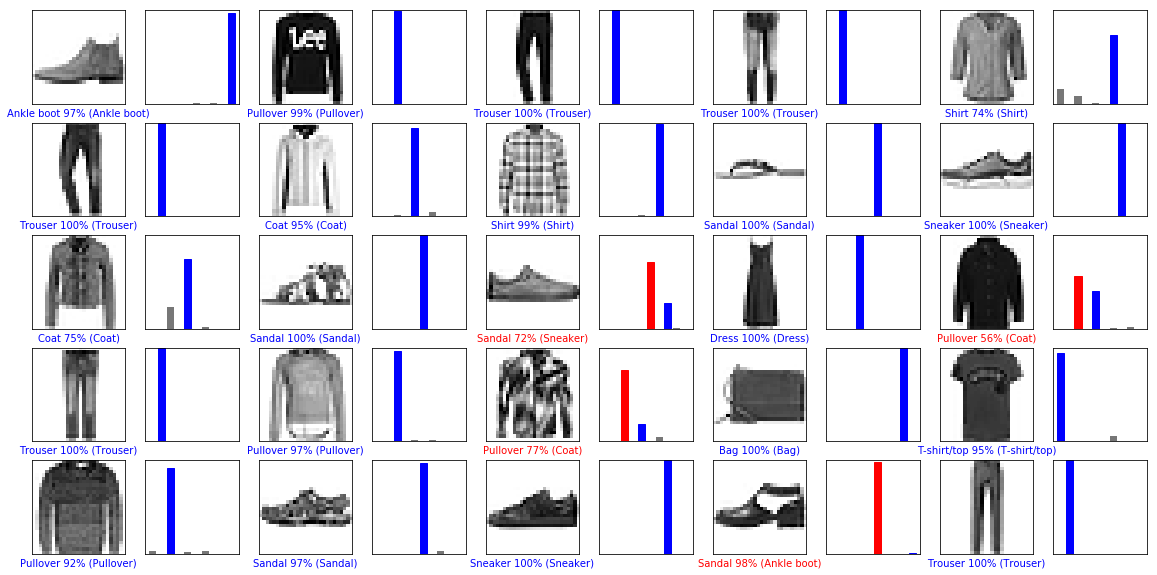

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [23]:
prediction_single = model.predict(img)

In [24]:
print(prediction_single)

[[4.3358254e-05 6.1765940e-07 2.0974708e-06 7.4050767e-08 1.9301019e-06
  1.3530113e-02 1.6437205e-05 1.2962518e-02 2.3174824e-05 9.7341961e-01]]


In [25]:
 np.argmax(prediction_single)

9

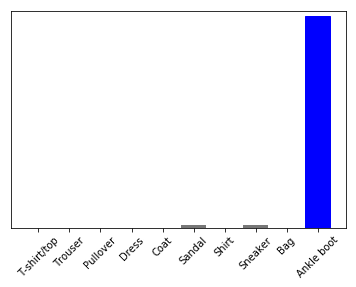

In [26]:
plot_value_array(0, prediction_single, test_labels)
# rotate labels by 45 degrees for viewing
_ = plt.xticks(range(len(class_names)), class_names, rotation=45)